# Example of sampling of the models with discrete variables

In [1]:
%load_ext autoreload
%autoreload 2
import pymc4 as pm
import arviz as az

## Bernoulli

In [2]:
@pm.model
def bernoulli():
    var1 = yield pm.Bernoulli("var1", 0.2)
    var2 = yield pm.Bernoulli("var2", 0.5)
    var3 = yield pm.Bernoulli("var3", 0.8)

In [3]:
trace = pm.sample(bernoulli(), sampler_type="compound") 
# after the review default attribute should be compound and if there is no
# discrete variable in the model, we choose nuts as the sampler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ae0642e10>,
      dtype=object)

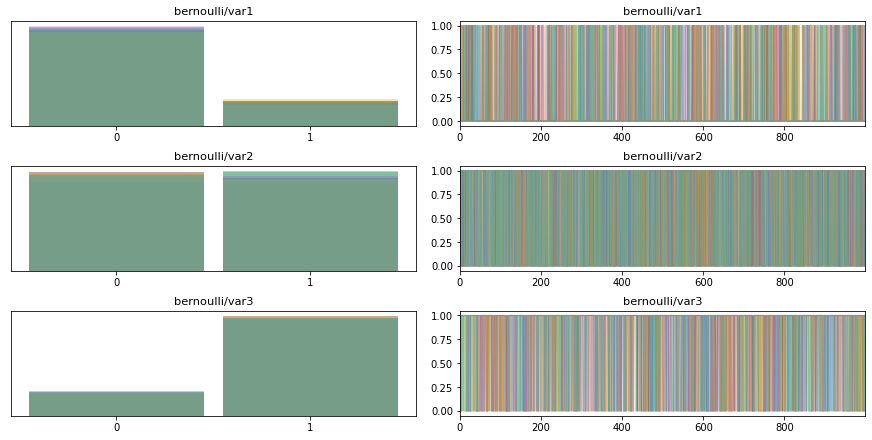

In [4]:
az.plot_trace(trace)

## Categorical

In [5]:
@pm.model
def categorical():
    var1 = yield pm.Categorical("var1", probs=[0.2, 0.4, 0.4])
    var1 = yield pm.Categorical("var2", probs=[0.1, 0.3, 0.2, 0.2, 0.2])
    var1 = yield pm.Categorical("var3", probs=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

In [6]:
trace = pm.sample(categorical(), sampler_type="compound") 
# after the review default attribute should be compound and if there is no
# discrete variable in the model, we choose nuts as the sampler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aacda79b0>,
      dtype=object)

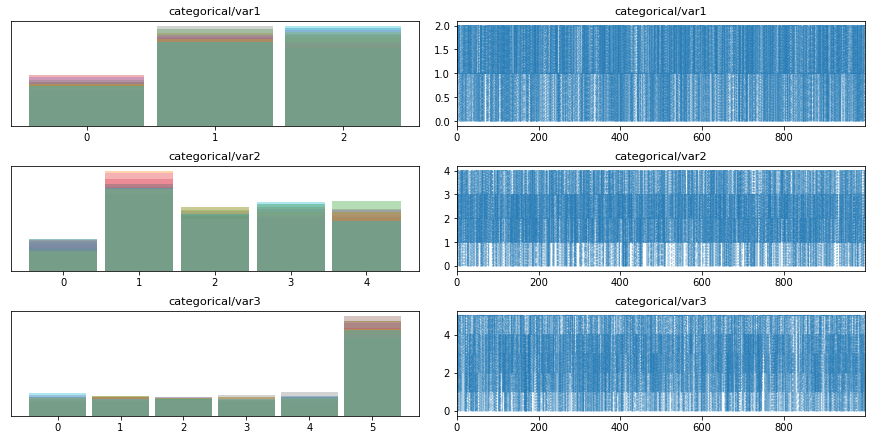

In [7]:
az.plot_trace(trace, compact=True)

## Poisson

In [8]:
from pymc4.distributions.state_functions import gaussian_round_fn, poisson_fn
from pymc4.mcmc.samplers import RandomWalkM
import functools

@pm.model
def model():
    var1 = yield pm.Poisson("var1", 4) # gaussian with round dist proposal
    var1 = yield pm.Poisson("var2", 4) # poisson dist proposal
    var2 = yield pm.Poisson("var3", 4) # continous space

In [9]:
trace = pm.sample(model(), 
                  sampler_type="compound", 
                  sampler_methods=[
                      ("var1", RandomWalkM, {"new_state_fn": gaussian_round_fn}),
                      ("var2", RandomWalkM, {"new_state_fn": functools.partial(poisson_fn, scale=4)}), # not sure if this is the right way to define proposal
                  ],
                  trace_discrete=["var1", "var2"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aac983630>,
      dtype=object)

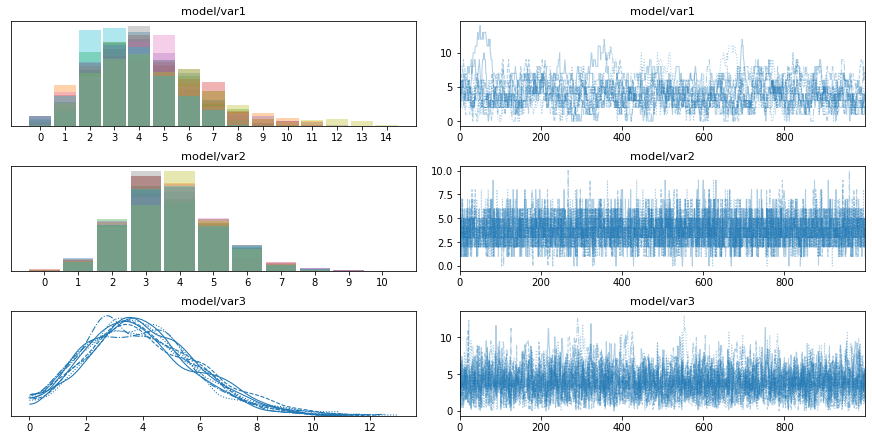

In [10]:
az.plot_trace(trace, compact=True)